In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import copy

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df

id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage            director  \
0                          http://www.jurassicworld.com/     Colin Trevorrow   
1                            http://www.madmaxmovie.com/       George Miller   
2         http://www.thedivergentseries.movie/#insurgent    Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...         J.J. Abrams   
4                               http://www.furious7.com/           James Wan   
...                                                  ...                 ...   
10861                                                NaN         Bruce Brown   
10862                                                NaN  John Frankenheimer   
10863                                                NaN      Eldar Ryazanov   
10864                                                NaN         Woody Allen   
10865                                                NaN    Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10861                                                NaN  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                NaN  ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...     124   
1      An apocalyptic story set in the furthest reach...     120   
2      Beatrice Prior must confront her inner demons ...     119   
3      Thirty years after defeating the Galactic E

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

(10866, 21)

In [4]:
df.describe().T

count          mean           std          min           25%  \
id            10866.0  6.606418e+04  9.213014e+04     5.000000  10596.250000   
popularity    10866.0  6.464410e-01  1.000185e+00     0.000065      0.207583   
budget        10866.0  1.462570e+07  3.091321e+07     0.000000      0.000000   
revenue       10866.0  3.982332e+07  1.170035e+08     0.000000      0.000000   
runtime       10866.0  1.020709e+02  3.138141e+01     0.000000     90.000000   
vote_count    10866.0  2.173897e+02  5.756191e+02    10.000000     17.000000   
vote_average  10866.0  5.974922e+00  9.351418e-01     1.500000      5.400000   
release_year  10866.0  2.001323e+03  1.281294e+01  1960.000000   1995.000000   
budget_adj    10866.0  1.755104e+07  3.430616e+07     0.000000      0.000000   
revenue_adj   10866.0  5.136436e+07  1.446325e+08     0.000000      0.000000   

                       50%           75%           max  
id            20669.000000  7.561000e+04  4.178590e+05  
popularity        0.383856  7.138170e-01  3.298576e+01  
budget            0.000000  1.500000e+07  4.250000e+08  
revenue           0.000000  2.400000e+07  2.781506e+09  
runtime          99.000000  1.110000e+02  9.000000e+02  
vote_count       38.000000  1.457500e+02  9.767000e+03  
vote_average      6.000000  6.600000e+00  9.200000e+00  
release_year   2006.000000  2.011000e+03  2.015000e+03  
budget_adj        0.000000  2.085325e+07  4.250000e+08  
revenue_adj       0.000000  3.369710e+07  2.827124e+09

In [21]:
# we find from this describtion that we have some movies with zero budget and revenue which is not right or may the movie is not made at all 



In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [23]:
# we will try to find the data with null values and see what we can do and may start with the small amount first and go higher 

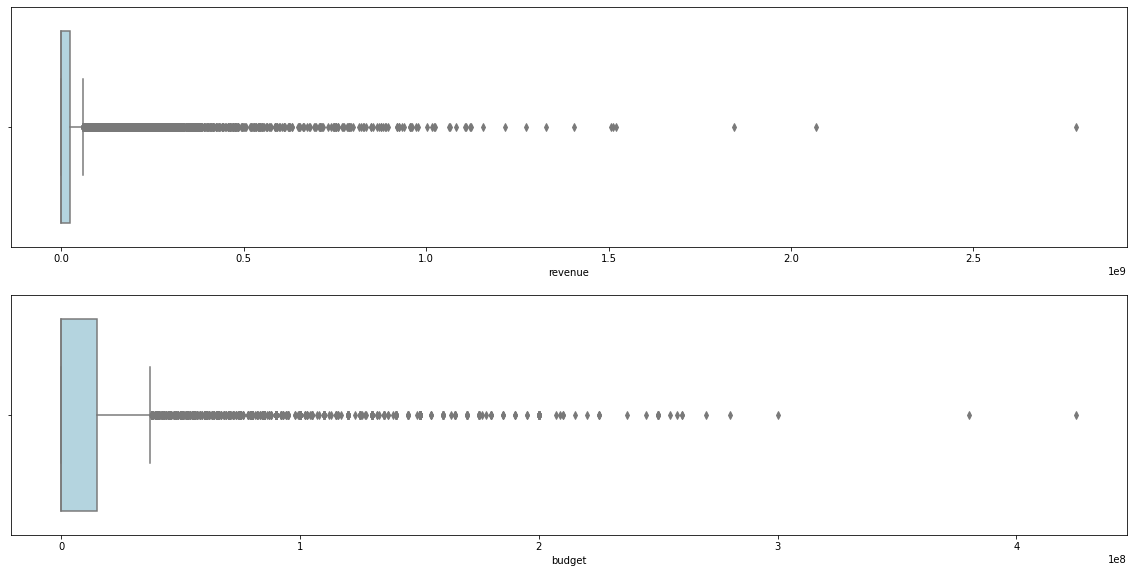

In [6]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.revenue, color='lightblue')


plt.subplot(3,1,2)
sns.boxplot(x= df.budget, color='lightblue')


plt.show()

In [22]:
# this box plot represents the table before that most of the data is around the zero and the rest are outliers

In [7]:
df[df['genres'].isnull()]

id    imdb_id  popularity  budget  revenue  \
424    363869  tt4835298    0.244648       0        0   
620    361043  tt5022680    0.129696       0        0   
997    287663        NaN    0.330431       0        0   
1712    21634  tt1073510    0.302095       0        0   
1897    40534  tt1229827    0.020701       0        0   
2370   127717  tt1525359    0.081892       0        0   
2376   315620  tt1672218    0.068411       0        0   
2853    57892  tt0270053    0.130018       0        0   
3279    54330  tt1720044    0.145331       0        0   
4547   123024  tt2305700    0.520520       0        0   
4732   139463  tt2084977    0.235911       0        0   
4797   369145        NaN    0.167501       0        0   
4890   126909  tt2219564    0.083202       0        0   
5830   282848  tt2986512    0.248944       0        0   
5934   200204  tt2808968    0.067433       0        0   
6043   190940  tt2797242    0.039080       0        0   
6530   168891  tt0818519    0.092724       0        0   
8234    56804  tt0114844    0.028874       0        0   
8614    65595  tt0117880    0.273934       0        0   
8878    92208  tt0250593    0.038045       0        0   
9307   141859  tt0097446    0.094652       0        0   
9799    48847  tt0193716    0.175008       0        0   
10659    4255  tt0065904    0.344172    5000        0   

                                          original_title  \
424                                       Belli di papÃ    
620                                   All Hallows' Eve 2   
997                 Star Wars Rebels: Spark of Rebellion   
1712                                   Prayers for Bobby   
1897              Jonas Brothers: The Concert Experience   
2370                                     Freshman Father   
2376                       Doctor Who: A Christmas Carol   
2853                                           Vizontele   
3279                                       ì•„ê¸°ì™€ ë‚˜   
4547   London 2012 Olympic Opening Ceremony: Isles of...   
4732                                       The Scapegoat   
4797                             Doctor Who: The Snowmen   
4890                          Cousin Ben Troop Screening   
5830                  Doctor Who: The Time of the Doctor   
5934                                        Prada: Candy   
6043                                      Bombay Talkies   
6530                                         Saw Rebirth   
8234                                     Viaggi di nozze   
8614                          T2 3-D: Battle Across Time   
8878                     Mom's Got a Date With a Vampire   
9307                                           Goldeneye   
9799                                         The Amputee   
10659                      The Party at Kitty and Stud's   

                                                    cast  \
424    Diego Abatantuono|Matilde Gioli|Andrea Pisani|...   
620                                                  NaN   
997    Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...   
1712   Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...   
1897   Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...   
2370   Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...   
2376   Matt Smith|Karen Gillan|Arthur Darvill|Michael...   
2853   YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...   
3279            Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan   
4547   Queen Elizabeth II|Mike Oldfield|Kenneth Brana...   
4732   Andrew Scott|Jodhi May|Eileen Atkins|Matthew R...   
4797   Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...   
4890                                   Jason Schwartzman   
5830                            Matt Smith|Jenna Coleman   
5934            Peter Gadiot|Rodolphe Pauly|LÃ©a Seydoux   
6043   Aamir Khan|Rani Mukerji|Randeep Hooda|Saqib Sa...   
6530   Whit Anderson|Stan Kirsch|Jeff Shuter|George W...   
8234   Carlo Verdone|Claudia Gerini|Veronica Pivetti|...   
8614   Arnold Schwarzenegger|Linda Hamilton|Edward Fu...   
8

In [8]:
df[df['director'].isnull()]

id    imdb_id  popularity   budget   revenue  \
532    320996  tt4073952    0.126594        0         0   
548    355131        NaN    0.108072        0         0   
556    321160  tt3908634    0.100910        0         0   
1032   259910  tt3591568    0.291253        0         0   
1054   253675  tt3711030    0.269468        0         0   
1203   256561  tt3203290    0.119891   150000         0   
1241   296370  tt3024964    0.135376        0         0   
1288   301235  tt4217172    0.038364        0         0   
1852   133365  tt1127205    0.256703        0         0   
1872    26379  tt1532957    0.091395  3250000         0   
1895   281979  tt1413314    0.056777        0         0   
2221    48832  tt1707823    0.281852        0         0   
2286    47911  tt1747960    0.207234        0         0   
2290    51823  tt1663193    0.203502        0         0   
2315    48373  tt1274296    0.171615        0         0   
2318    34134  tt1610301    0.170408        0         0   
2376   315620  tt1672218    0.068411        0         0   
2397   241829  tt1805454    0.033048        0         0   
2401    45644        NaN    0.067753        0         0   
2403    72013  tt1587157    0.067620        0         0   
3171    17171  tt1201984    0.019819        0         0   
3224    20313  tt1270491    0.224721        0         0   
3276    15467  tt1105733    0.147657  4180000  11000000   
3285    36131  tt1286750    0.136883        0         0   
3357    32836  tt1254947    0.042517        0         0   
3365    22258  tt1321823    0.002475        0         0   
3369    77974  tt2014400    0.001682        0         0   
3910    79976  tt2096615    0.002006        0         0   
4679    91342  tt2197823    0.421746        0         0   
4797   369145        NaN    0.167501        0         0   
4872   269177        NaN    0.090552        0         0   
4939   168219  tt2167393    0.003183        0         0   
5413    20378  tt0163986    0.324270        0         0   
5866   246569  tt2934844    0.211825  5000000         0   
5915   284019  tt2283584    0.168210        0         0   
5972   238234  tt3258142    0.165605        0         0   
6033   238185  tt3397430    0.048587        0         0   
6181    18729  tt0088583    0.000065        0         0   
7579    58432  tt0484273    0.443952        0         0   
7767   282758  tt0827573    0.126603        0         0   
7814    25565  tt1236486    0.040311        0         0   
9593    46188  tt0220698    0.001662        0         0   
10386  225804  tt1028555    0.118854        0         0   
10426   34038  tt0061937    0.114034        0         0   

                                          original_title  \
532                       Iliza Shlesinger: Freezing Hot   
548                           Sense8: Creating the World   
556                                       With This Ring   
1032               Marvel Studios: Assembling a Universe   
1054                                  Unlocking Sherlock   
1203                                        Free to Play   
1241                                           Dance-Off   
1288                   Top Gear: The Perfect Road Trip 2   
1852                             The Diary of Anne Frank   
1872                                                 Paa   
1895                      Doctor Who: The Waters of Mars   
2221                     Scott Pilgrim vs. the Animation   
2286                     Bo Burnham: Words, Words, Words   
2290       Across the Line: The Exodus of Charlie Wright   
2315                                Listen to Your Heart   
2318                            Barbie in A Mermaid Tale   
2376                       Doctor Who: A Christmas Carol   
2397                      The Making of The Walking Dead   
2401     Opeth: In Live Concert At The Royal Albert Hall   
2403                     Yu-Gi-Oh! 3D: Bonds Beyond Time   
3171   The Assassination of Jesse James: Death Of An ...   
3224   John Mayer: Where the Light 

In [9]:
df[df['tagline'].isnull()]

id    imdb_id  popularity    budget    revenue  \
42     321697  tt2080374    3.079522  30000000   34441873   
53     274479  tt2446980    2.793297  60000000  101134059   
72     284289  tt2911668    2.272044         0      45895   
74     347096  tt3478232    2.165433         0          0   
92     370687  tt3608646    1.876037         0          0   
...       ...        ...         ...       ...        ...   
10840   34388  tt0060437    0.102530         0          0   
10842   36540  tt0061199    0.253437         0          0   
10859   20620  tt0060955    0.089072         0          0   
10861      21  tt0060371    0.080598         0          0   
10863   39768  tt0060161    0.065141         0          0   

                           original_title  \
42                             Steve Jobs   
53                                    Joy   
72                       Beyond the Reach   
74                 Mythica: The Darkspore   
92               Mythica: The Necromancer   
...                                   ...   
10840                   Funeral in Berlin   
10842  Winnie the Pooh and the Honey Tree   
10859                             Seconds   
10861                  The Endless Summer   
10863                 Beregis Avtomobilya   

                                                    cast  \
42     Michael Fassbender|Kate Winslet|Seth Rogen|Kat...   
53     Jennifer Lawrence|Bradley Cooper|Robert De Nir...   
72     Michael Douglas|Jeremy Irvine|Hanna Mangan Law...   
74     Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...   
92     Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...   
...                                                  ...   
10840  Michael Caine|Paul Hubschmid|Oskar Homolka|Eva...   
10842  Sterling Holloway|Junius Matthews|Sebastian Ca...   
10859  Rock Hudson|Salome Jens|John Randolph|Will Gee...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   

                                        homepage                 director  \
42               http://www.stevejobsthefilm.com              Danny Boyle   
53           http://www.foxmovies.com/movies/joy         David O. Russell   
72                                           NaN  Jean-Baptiste LÃ©onetti   
74     http://www.mythicamovie.com/#!blank/wufvh            Anne K. Black   
92     http://www.mythicamovie.com/#!blank/y9ake            A. Todd Smith   
...                                          ...                      ...   
10840                                        NaN             Guy Hamilton   
10842                                        NaN      Wolfgang Reitherman   
10859                                        NaN       John Frankenheimer   
10861                                        NaN              Bruce Brown   
10863                                        NaN           Eldar Ryazanov   

      tagline  ...                                           overview runtime  \
42        NaN  ...  Set backstage at three iconic product launches...     122   
53        NaN  ...  A story based on the life of a struggling Long...     124   
72        NaN  ...  A high-rolling corporate shark and his impover...      95   
74        NaN  ...  When Teelaâ€™s sister is murdered and a powerf...     108   
92        NaN  ...  Mallister takes Thane prisoner and forces Mare...       0   
...       ...  ...                                                ...     ...   
10840     NaN  ...  Colonel Stok, a Soviet intelligence officer re...     102   
10842     NaN  ...  Christopher Robin's bear attempts to raid a be...      25   
10859     NaN  ...  A secret organisation offers wealthy people a ...     100   
10861     NaN  ...  The Endless Summer, by Bruce Brown, is one of ...      95   
10863     NaN  ...  An insurance agent who moonlights as a carthie...      94   

                                       genres  \
42                              History|Drama   
53                  

In [24]:
# Now we can drop all the movies with null budget or revenue but some have budget and no revenue so instead of loosing all the data we can drop that have 0 in both and substitute the rest with an average value instead 

In [10]:
df1 = df[(df['revenue']!=0) | (df['budget'] != 0) ]
df1

# df=PCAdf
# PCAdf=PCAdf.drop('Status', axis=1)
# df
# # df.drop('column_name', axis=1, inplace=True)
# # df.drop(['Notes', 'Statues'], axis=1, inplace=True)
# # PCAdf.shape

#I was not able to drop rows in which both revenue and budget are qeual to zero so I choose the other rows insted 
#But it doesn't make sense the or condition work on getting the right numbers of rows than the and 
#because if I have budget for a movie but no revune or the opposite I want to replace the 0 with average value 


id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10835    5923  tt0060934    0.299911   12000000    20000000   
10841   42701  tt0062262    0.264925      75000           0   
10848    2161  tt0060397    0.207257    5115000    12000000   
10855   13343  tt0059221    0.141026     700000           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10835              The Sand Pebbles   
10841                  The Shooting   
10848              Fantastic Voyage   
10855       The Ghost & Mr. Chicken   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10835  Steve McQueen|Richard Attenborough|Richard Cre...   
10841  Will Hutchins|Millie Perkins|Jack Nicholson|Wa...   
10848  Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...   
10855  Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage           director  \
0                          http://www.jurassicworld.com/    Colin Trevorrow   
1                            http://www.madmaxmovie.com/      George Miller   
2         http://www.thedivergentseries.movie/#insurgent   Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...        J.J. Abrams   
4                               http://www.furious7.com/          James Wan   
...                                                  ...                ...   
10835                                                NaN        Robert Wise   
10841                                                NaN      Monte Hellman   
10848                                                NaN  Richard Fleischer   
10855                                                NaN        Alan Rafkin   
10865                                                NaN   Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10835  This is the heroic story of the men on the U.S...  ...   
10841  Suspenseful desert pursuit in the "High Noon" ...  ...   
10848  A Fantastic and Spectacular Voyage... Through ...  ...   
10855  G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...     124   
1      An apocalyptic story set in the furthest reach...     120   
2      Beatrice Prior must confront her inner demons ...     119   
3      Thirty years after defeating the Galactic Empi...     1

In [11]:
df1.isnull().sum()

id                         0
imdb_id                    1
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      12
homepage                4219
director                   4
tagline                  800
keywords                 428
overview                   0
runtime                    0
genres                     1
production_companies     186
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [25]:
# the number of nulls is reduced in some and became zero in another 

In [12]:
df1[df1['revenue']==0]

id    imdb_id  popularity    budget  revenue  \
48     265208  tt2231253    2.932340  30000000        0   
67     334074  tt3247714    2.331636  20000000        0   
93     307663  tt3480796    1.872696  10000000        0   
133    157827  tt2217859    1.251681  11000000        0   
145    294963  tt2494362    1.073349   1800000        0   
...       ...        ...         ...       ...      ...   
10827    2661  tt0060153    0.410366   1377800        0   
10832   23030  tt0060121    0.358161   4800000        0   
10841   42701  tt0062262    0.264925     75000        0   
10855   13343  tt0059221    0.141026    700000        0   
10865   22293  tt0060666    0.035919     19000        0   

                 original_title  \
48                    Wild Card   
67                     Survivor   
93                         Vice   
133           Louder Than Bombs   
145               Bone Tomahawk   
...                         ...   
10827                    Batman   
10832                 Arabesque   
10841              The Shooting   
10855   The Ghost & Mr. Chicken   
10865  Manos: The Hands of Fate   

                                                    cast  \
48     Jason Statham|Michael Angarano|Milo Ventimigli...   
67     Pierce Brosnan|Milla Jovovich|Dylan McDermott|...   
93     Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...   
133    Gabriel Byrne|Isabelle Huppert|Jesse Eisenberg...   
145    Kurt Russell|Richard Jenkins|Matthew Fox|Lili ...   
...                                                  ...   
10827  Adam West|Burt Ward|Cesar Romero|Burgess Mered...   
10832  Gregory Peck|Sophia Loren|Alan Badel|Kieron Mo...   
10841  Will Hutchins|Millie Perkins|Jack Nicholson|Wa...   
10855  Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                      homepage             director  \
48                                         NaN           Simon West   
67                   http://survivormovie.com/       James McTeigue   
93                                         NaN       Brian A Miller   
133    http://www.motlys.com/louder-than-bombs        Joachim Trier   
145                                        NaN      S. Craig Zahler   
...                                        ...                  ...   
10827                                      NaN  Leslie H. Martinson   
10832                                      NaN        Stanley Donen   
10841                                      NaN        Monte Hellman   
10855                                      NaN          Alan Rafkin   
10865                                      NaN     Harold P. Warren   

                                                 tagline  ...  \
48           Never bet against a man with a killer hand.  ...   
67                    His Next Target is Now Hunting Him  ...   
93                        Where the future is your past.  ...   
133                                                  NaN  ...   
145    May the Lord have mercy and grant you a swift ...  ...   
...                                                  ...  ...   
10827           He's Here Big As Life In A Real Bat-Epic  ...   
10832               Ultra Mod. Ultra Mad. Ultra Mystery.  ...   
10841  Suspenseful desert pursuit in the "High Noon" ...  ...   
10855  G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
48     When a Las Vegas bodyguard with lethal skills ...      92   
67     A Foreign Service Officer in London tries to p...      96   
93     Julian Michaels has designed the ultimate reso...      96   
133    Three years after his wife, acclaimed photogra...     109   
145    During a shootout in a saloon, Sheriff Hunt in...     132   
...                                                  ...     ...   
10827  The Dynamic Duo faces four super-villains w

In [26]:
x = df1['revenue'].median()
y = df1['budget'].median()
print(x,y)



# here we got the median instead of the mean since the data are skewed and we have a lot of outliers 

16549477.0 12000000.0


In [14]:
df1['revenue'].replace([0],x,inplace=True)
df1['budget'].replace([0],y,inplace=True)
df1

C:\Users\mahmo\AppData\Local\Temp\ipykernel_11388\2191742587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['revenue'].replace([0],x,inplace=True)
C:\Users\mahmo\AppData\Local\Temp\ipykernel_11388\2191742587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['budget'].replace([0],y,inplace=True)


id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10835    5923  tt0060934    0.299911   12000000    20000000   
10841   42701  tt0062262    0.264925      75000    16549477   
10848    2161  tt0060397    0.207257    5115000    12000000   
10855   13343  tt0059221    0.141026     700000    16549477   
10865   22293  tt0060666    0.035919      19000    16549477   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10835              The Sand Pebbles   
10841                  The Shooting   
10848              Fantastic Voyage   
10855       The Ghost & Mr. Chicken   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10835  Steve McQueen|Richard Attenborough|Richard Cre...   
10841  Will Hutchins|Millie Perkins|Jack Nicholson|Wa...   
10848  Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...   
10855  Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage           director  \
0                          http://www.jurassicworld.com/    Colin Trevorrow   
1                            http://www.madmaxmovie.com/      George Miller   
2         http://www.thedivergentseries.movie/#insurgent   Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...        J.J. Abrams   
4                               http://www.furious7.com/          James Wan   
...                                                  ...                ...   
10835                                                NaN        Robert Wise   
10841                                                NaN      Monte Hellman   
10848                                                NaN  Richard Fleischer   
10855                                                NaN        Alan Rafkin   
10865                                                NaN   Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10835  This is the heroic story of the men on the U.S...  ...   
10841  Suspenseful desert pursuit in the "High Noon" ...  ...   
10848  A Fantastic and Spectacular Voyage... Through ...  ...   
10855  G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...     124   
1      An apocalyptic story set in the furthest reach...     120   
2      Beatrice Prior must confront her inner demons ...     119   
3      Thirty years after defeating the Galactic Empi...     1

In [27]:
# we replaced zeros in budget and revenue with median values

In [15]:
# df1[df1['budget']==0]

In [16]:
# df1[df1['profit']==0]

In [17]:
df1['profit'] = df1['revenue'] - df1['budget']
df1

C:\Users\mahmo\AppData\Local\Temp\ipykernel_11388\197217089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['profit'] = df1['revenue'] - df1['budget']


id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10835    5923  tt0060934    0.299911   12000000    20000000   
10841   42701  tt0062262    0.264925      75000    16549477   
10848    2161  tt0060397    0.207257    5115000    12000000   
10855   13343  tt0059221    0.141026     700000    16549477   
10865   22293  tt0060666    0.035919      19000    16549477   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10835              The Sand Pebbles   
10841                  The Shooting   
10848              Fantastic Voyage   
10855       The Ghost & Mr. Chicken   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10835  Steve McQueen|Richard Attenborough|Richard Cre...   
10841  Will Hutchins|Millie Perkins|Jack Nicholson|Wa...   
10848  Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...   
10855  Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage           director  \
0                          http://www.jurassicworld.com/    Colin Trevorrow   
1                            http://www.madmaxmovie.com/      George Miller   
2         http://www.thedivergentseries.movie/#insurgent   Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...        J.J. Abrams   
4                               http://www.furious7.com/          James Wan   
...                                                  ...                ...   
10835                                                NaN        Robert Wise   
10841                                                NaN      Monte Hellman   
10848                                                NaN  Richard Fleischer   
10855                                                NaN        Alan Rafkin   
10865                                                NaN   Harold P. Warren   

                                                 tagline  ... runtime  \
0                                      The park is open.  ...     124   
1                                     What a Lovely Day.  ...     120   
2                             One Choice Can Destroy You  ...     119   
3                          Every generation has a story.  ...     136   
4                                    Vengeance Hits Home  ...     137   
...                                                  ...  ...     ...   
10835  This is the heroic story of the men on the U.S...  ...     182   
10841  Suspenseful desert pursuit in the "High Noon" ...  ...      82   
10848  A Fantastic and Spectacular Voyage... Through ...  ...     100   
10855  G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...  ...      90   
10865       It's Shocking! It's Beyond Your Imagination!  ...      74   

                                          genres  \
0      Action|Adventure|Science Fiction|Thriller   
1      Action|Adventure|Science Fiction|Thriller   
2             Adventure|Science Fiction|Thriller   
3       Action|Adventure|Scien

In [28]:
# I calculated the profit so we can get an over view over on our data after cleaning and and see if the movies are sucsseul or not 

In [18]:
df1.describe().T

count          mean           std           min           25%  \
id            6165.0  4.829199e+04  7.551565e+04  5.000000e+00  9.290000e+03   
popularity    6165.0  9.093665e-01  1.240761e+00  1.117000e-03  3.223200e-01   
budget        6165.0  2.771498e+07  3.628395e+07  1.000000e+00  8.000000e+06   
revenue       6165.0  7.371983e+07  1.467957e+08  2.000000e+00  1.260000e+07   
runtime       6165.0  1.064516e+02  2.315458e+01  0.000000e+00  9.300000e+01   
vote_count    6165.0  3.559012e+02  7.331673e+02  1.000000e+01  3.100000e+01   
vote_average  6165.0  6.038994e+00  8.725932e-01  1.500000e+00  5.500000e+00   
release_year  6165.0  2.000986e+03  1.191687e+01  1.960000e+03  1.994000e+03   
budget_adj    6165.0  3.093424e+07  4.074829e+07  0.000000e+00  2.374361e+06   
revenue_adj   6165.0  9.053125e+07  1.825535e+08  0.000000e+00  1.161956e+05   
profit        6165.0  4.600485e+07  1.240007e+08 -4.139124e+08 -4.200000e+06   

                       50%           75%           max  
id            1.375100e+04  4.828900e+04  4.178590e+05  
popularity    5.705240e-01  1.050599e+00  3.298576e+01  
budget        1.200000e+07  3.300000e+07  4.250000e+08  
revenue       1.654948e+07  7.144125e+07  2.781506e+09  
runtime       1.020000e+02  1.160000e+02  7.050000e+02  
vote_count    9.600000e+01  3.240000e+02  9.767000e+03  
vote_average  6.100000e+00  6.600000e+00  8.400000e+00  
release_year  2.004000e+03  2.010000e+03  2.015000e+03  
budget_adj    1.622504e+07  4.206376e+07  4.250000e+08  
revenue_adj   2.332541e+07  9.528091e+07  2.827124e+09  
profit        1.100685e+07  4.198046e+07  2.544506e+09

In [30]:
# here we can tell that most of the movies are sucsseful and only about 25% were not 

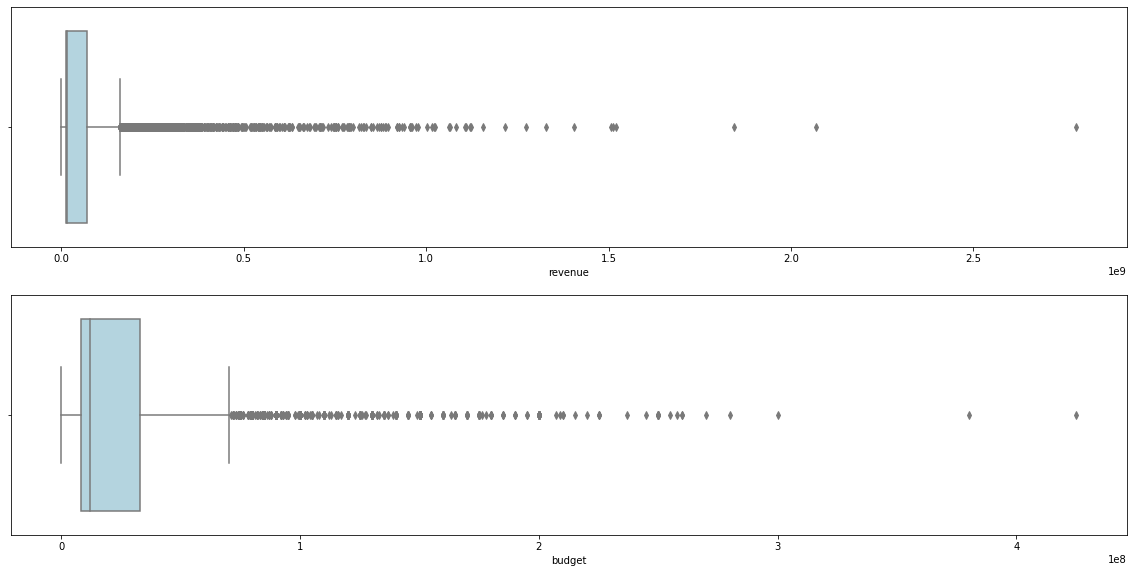

In [19]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df1.revenue, color='lightblue')


plt.subplot(3,1,2)
sns.boxplot(x= df1.budget, color='lightblue')


plt.show()

In [29]:
# we can see we have better distribution than before but still have a lot of outliers and there is a huge diversity in the budget and revenue of the movies 

In [20]:
# df1_encoded = copy.deepcopy(df1)
# df1_encoded.loc[:,['production_companies', 'genres', 'director']] = df1_encoded.loc[:,['production_companies', 'genres', 'director']].apply(LabelEncoder().fit_transform) 
# sns.pairplot(df1_encoded,hue='profit',palette='coolwarm')  #pairplot
# plt.show()

In [31]:
df1.duplicated().sum()

1

In [33]:
df1.drop_duplicates(inplace=True)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_11388\4156330626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [39]:
df1.corr()

id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000    0.097874 -0.081327 -0.053052 -0.048951    0.039906   
popularity    0.097874    1.000000  0.491132  0.640186  0.188380    0.794845   
budget       -0.081327    0.491132  1.000000  0.703044  0.247034    0.591758   
revenue      -0.053052    0.640186  0.703044  1.000000  0.213985    0.772596   
runtime      -0.048951    0.188380  0.247034  0.213985  1.000000    0.227555   
vote_count    0.039906    0.794845  0.591758  0.772596  0.227555    1.000000   
vote_average -0.052514    0.286243  0.079978  0.213386  0.302575    0.335739   
release_year  0.498536    0.146004  0.201275  0.100350 -0.101476    0.166612   
budget_adj   -0.163374    0.453351  0.951170  0.669285  0.301185    0.540470   
revenue_adj  -0.119106    0.580503  0.570458  0.908507  0.238758    0.682452   
profit       -0.039008    0.614162  0.539683  0.978113  0.181039    0.741470   

              vote_average  release_year  budget_adj  revenue_adj    profit  
id               -0.052514      0.498536   -0.163374    -0.119106 -0.039008  
popularity        0.286243      0.146004    0.453351     0.580503  0.614162  
budget            0.079978      0.201275    0.951170     0.570458  0.539683  
revenue           0.213386      0.100350    0.669285     0.908507  0.978113  
runtime           0.302575     -0.101476    0.301185     0.238758  0.181039  
vote_count        0.335739      0.166612    0.540470     0.682452  0.741470  
vote_average      1.000000     -0.130927    0.091788     0.252364  0.229209  
release_year     -0.130927      1.000000    0.048446    -0.085299  0.059905  
budget_adj        0.091788      0.048446    1.000000     0.597279  0.514006  
revenue_adj       0.252364     -0.085299    0.597279     1.000000  0.908595  
profit            0.229209      0.059905    0.514006     0.908595  1.000000

Text(0.5, 0, 'Frequency')

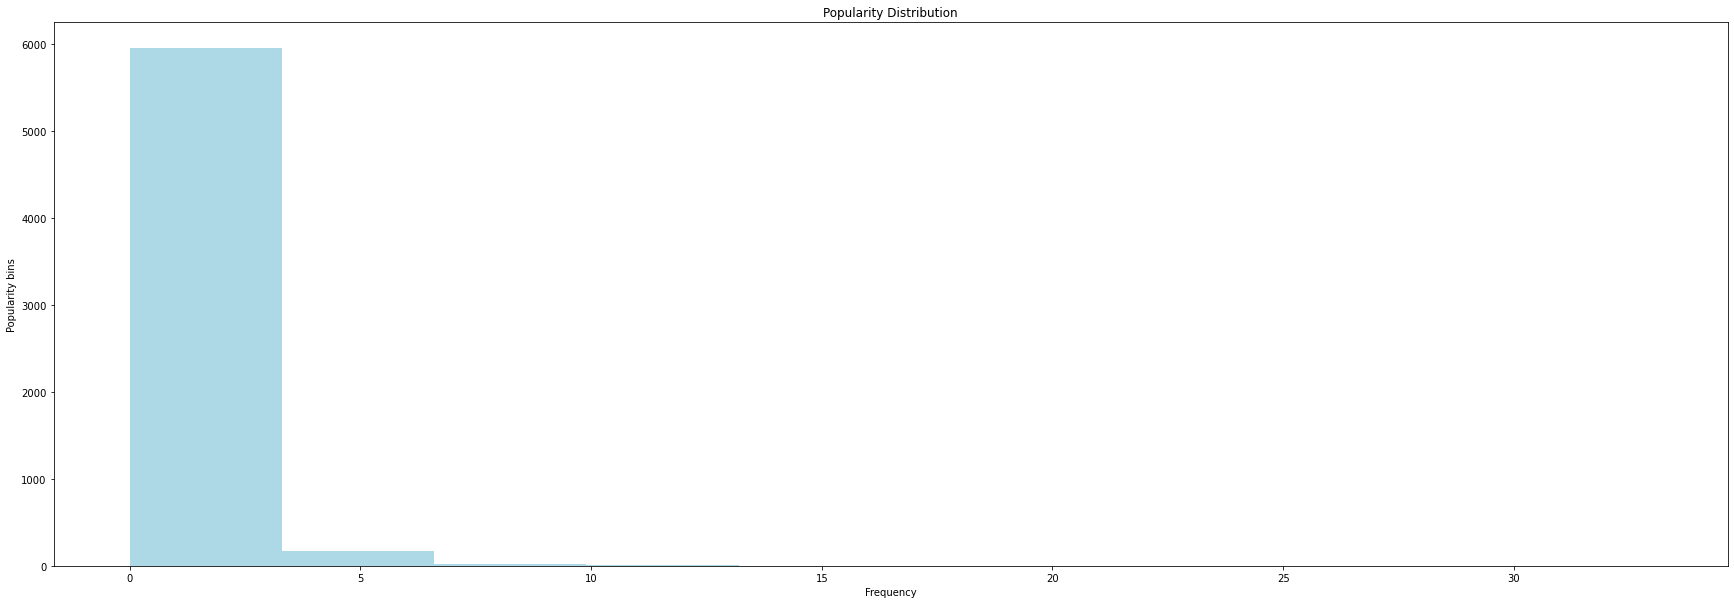

In [96]:
plt.figure(figsize= (30,10))
df1['popularity'].plot(kind='hist', color='lightblue')
plt.title('Popularity Distribution')
plt.ylabel('Popularity bins')
plt.xlabel('Frequency')

In [48]:
# this shows most of the popular movies are between 0 and 10 the rest can be outliers

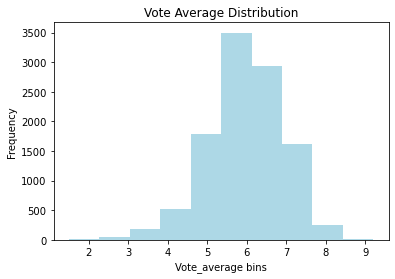

In [49]:
df['vote_average'].plot(kind='hist', color='lightblue')
plt.title('Vote Average Distribution')
plt.xlabel('Vote_average bins')
plt.ylabel('Frequency');

In [105]:
# this shows that vote average is slightly left skewed but the distribution is close to normal

D:\Programming\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

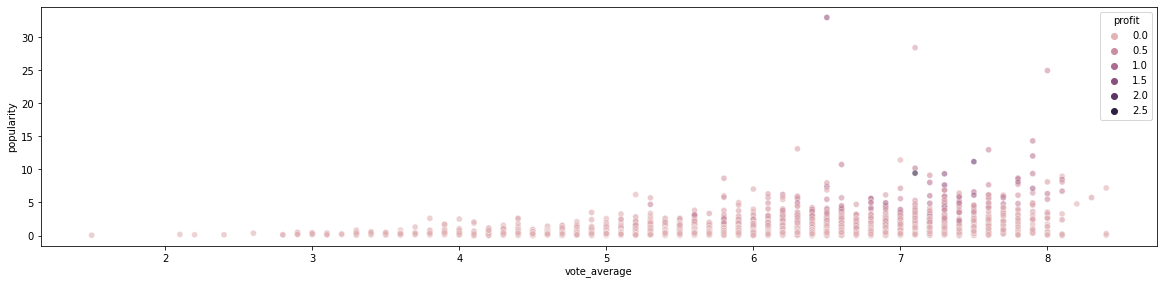

In [56]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.scatterplot(df1.vote_average, df1.popularity,hue=df1.profit ,alpha=0.6)

In [57]:
# this plot shows that vote average inc the popularity slightly inc too 

D:\Programming\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Programming\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Programming\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Prog

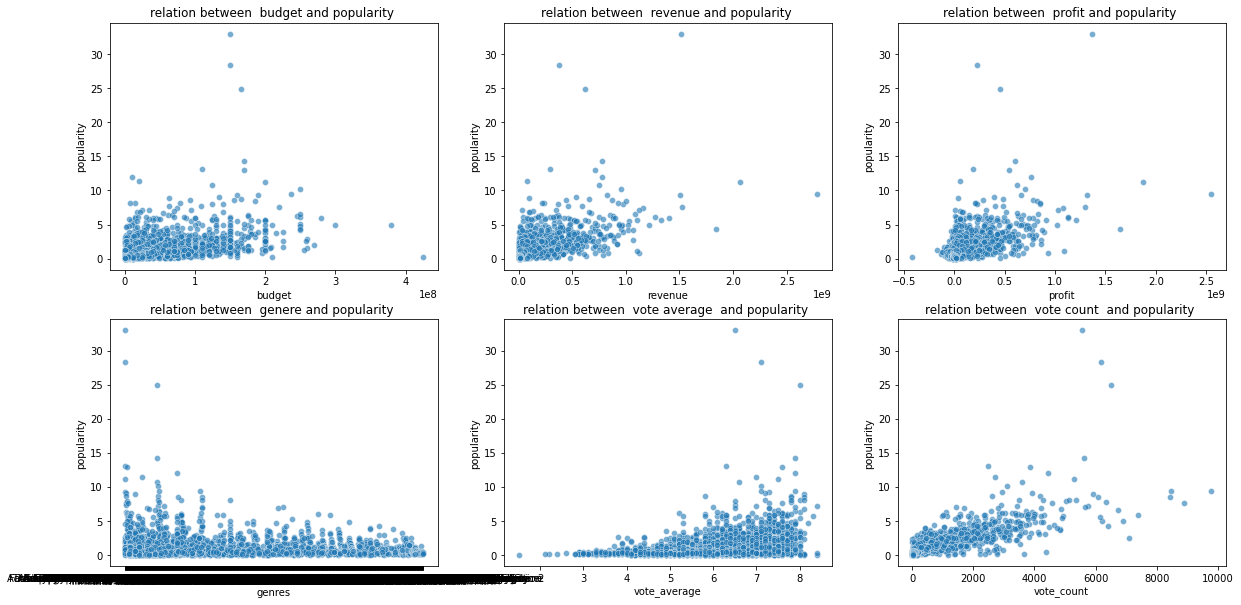

In [79]:
plt.figure(figsize=(20,10))


plt.subplot(2,3,1)
sns.scatterplot(df1.budget, df1.popularity ,alpha=0.6)
plt.title("relation between  budget and popularity ")


plt.subplot(2,3,2)
sns.scatterplot(df1.revenue, df1.popularity ,alpha=0.6)
plt.title("relation between  revenue and popularity ")


plt.subplot(2,3,3)
sns.scatterplot(df1.profit, df1.popularity ,alpha=0.6)
plt.title("relation between  profit and popularity ")


plt.subplot(2,3,4)
sns.scatterplot(df1.genres, df1.popularity ,alpha=0.6)
plt.title("relation between  genere and popularity ")


plt.subplot(2,3,5)
sns.scatterplot(df1.vote_average, df1.popularity ,alpha=0.6)
plt.title("relation between  vote average  and popularity ")



plt.subplot(2,3,6)
sns.scatterplot(df1.vote_count, df1.popularity ,alpha=0.6)
plt.title("relation between  vote count  and popularity ")

# sns.scatterplot(df1.budget, df1.popularity,hue=df1.popularity ,alpha=0.6)



plt.show()

In [ ]:
# it doesnt seem that popularity is affected so much by money(budget, revenue, and profit ) but the vote count and vote average seem to have direct relation with popularity and this makes sense 

# some generes too can be more popular and lead to more profit than other generes but most of the generes are in the same range 

D:\Programming\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'relation between  Profit, genere  and popularity ')

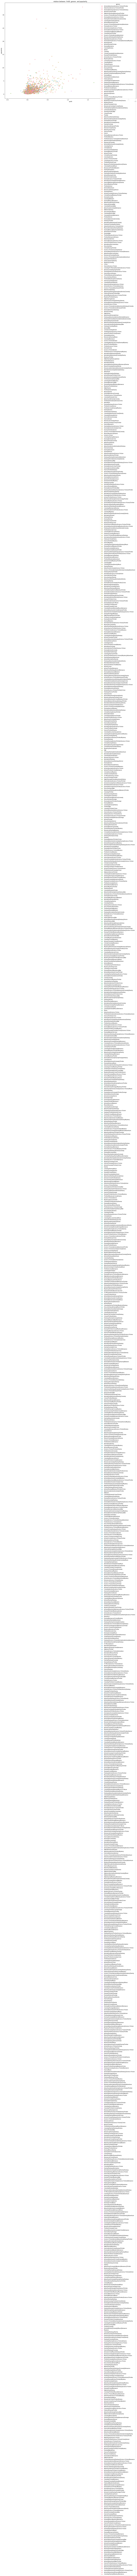

In [108]:
plt.figure(figsize= (20,15))
plt.subplot(1,1,1)
sns.scatterplot(df1.profit, df1.popularity,hue=df1.genres ,alpha=0.6)
plt.title("relation between  Profit, genere  and popularity ")





In [110]:
# this plot is so good showing that most of the movies are in the same range of profit and poplarity with small direct relation and small portion are scattering on the plot 

# it looks like there are three outliers with high popularity but average profit as the rest of the movies

# and we can tell that the movies from 0.5 to 1 are a good range to target high profit other than outliers after 1 and the rest between 0 and 0.5

# below 0 the movies -ve profit values 


Text(0, 0.5, 'vote count ')

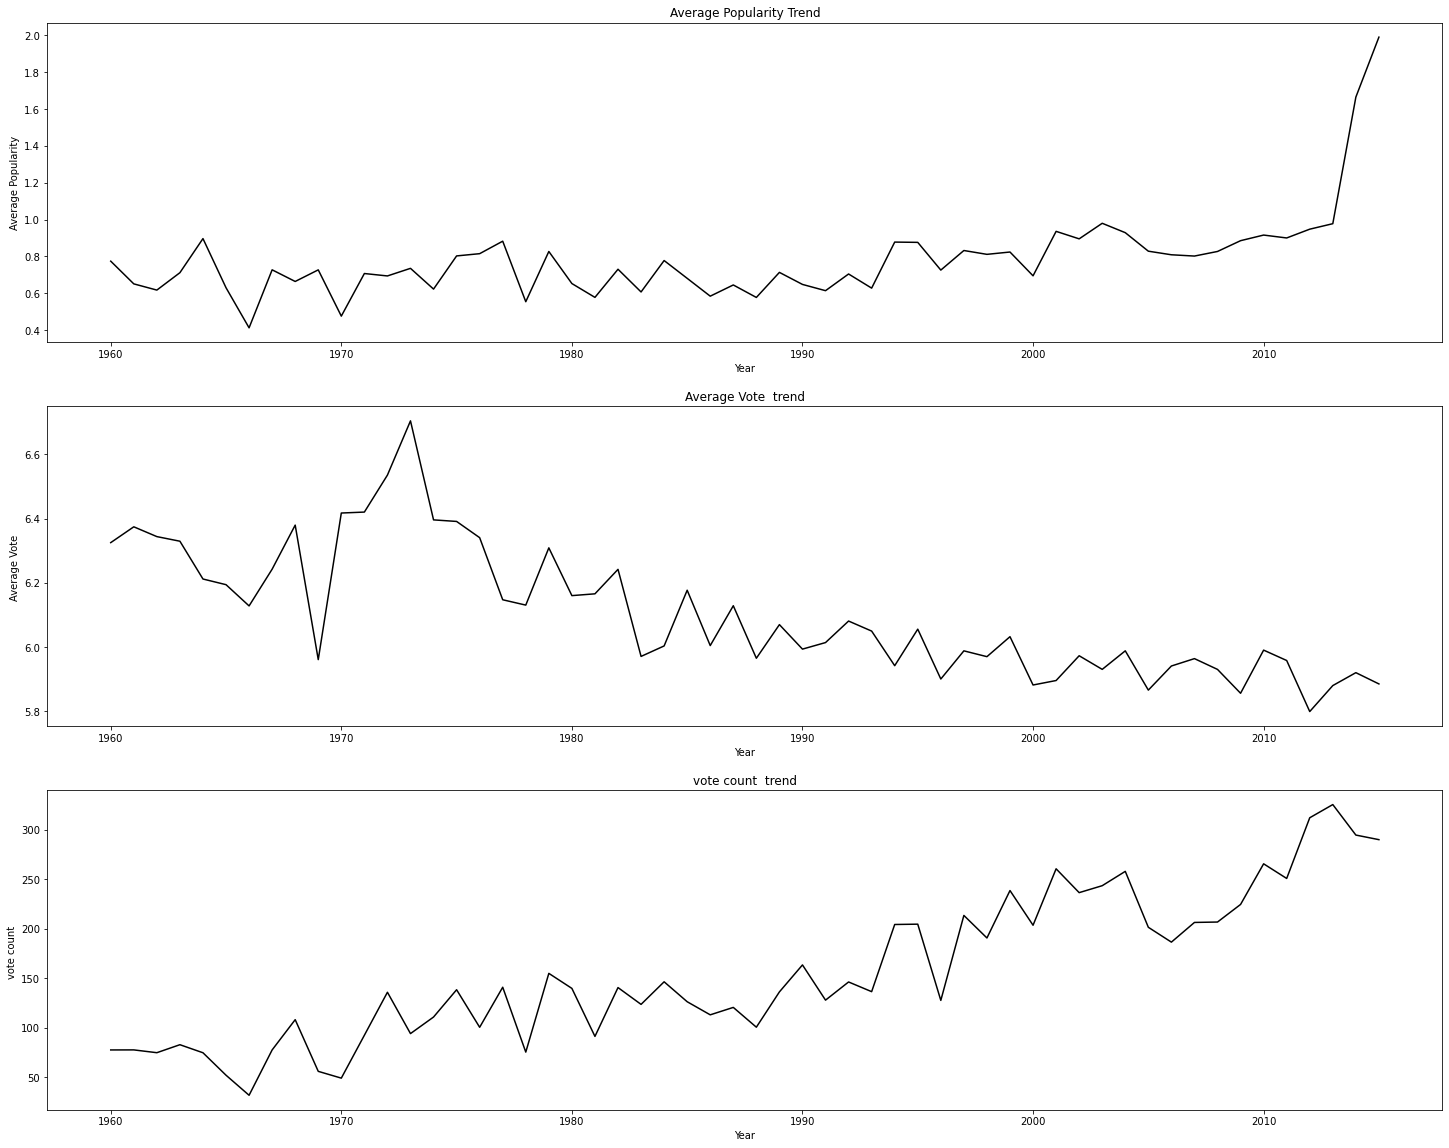

In [89]:
plt.figure(figsize=(25,20))

plt.subplot(3,1,1)
a = df1.groupby('release_year')['popularity'].mean()
plt.plot(a, color='black')
plt.title('Average Popularity Trend')
plt.xlabel('Year')
plt.ylabel('Average Popularity')

plt.subplot(3,1,2)
b = df.groupby('release_year')['vote_average'].mean()
plt.plot(b, color='black')
plt.title('Average Vote  trend')
plt.xlabel('Year')
plt.ylabel('Average Vote ')



plt.subplot(3,1,3)
c = df.groupby('release_year')['vote_count'].mean()
plt.plot(c, color='black')
plt.title('vote count  trend')
plt.xlabel('Year')
plt.ylabel('vote count ')


In [93]:
# the first graph shows a surge in the popularity of movies and this is intersting and kakes sense as the count of votes of people is increasing through years 

#the average number of vote of older movies is much higher than the new movies and this can make sense as the number of people voting increase the sum will be divided over a bigger number this may be a sighn as average increase less people are voting and the opposite 

D:\Programming\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'relation between  Profit, budget  and revenue ')

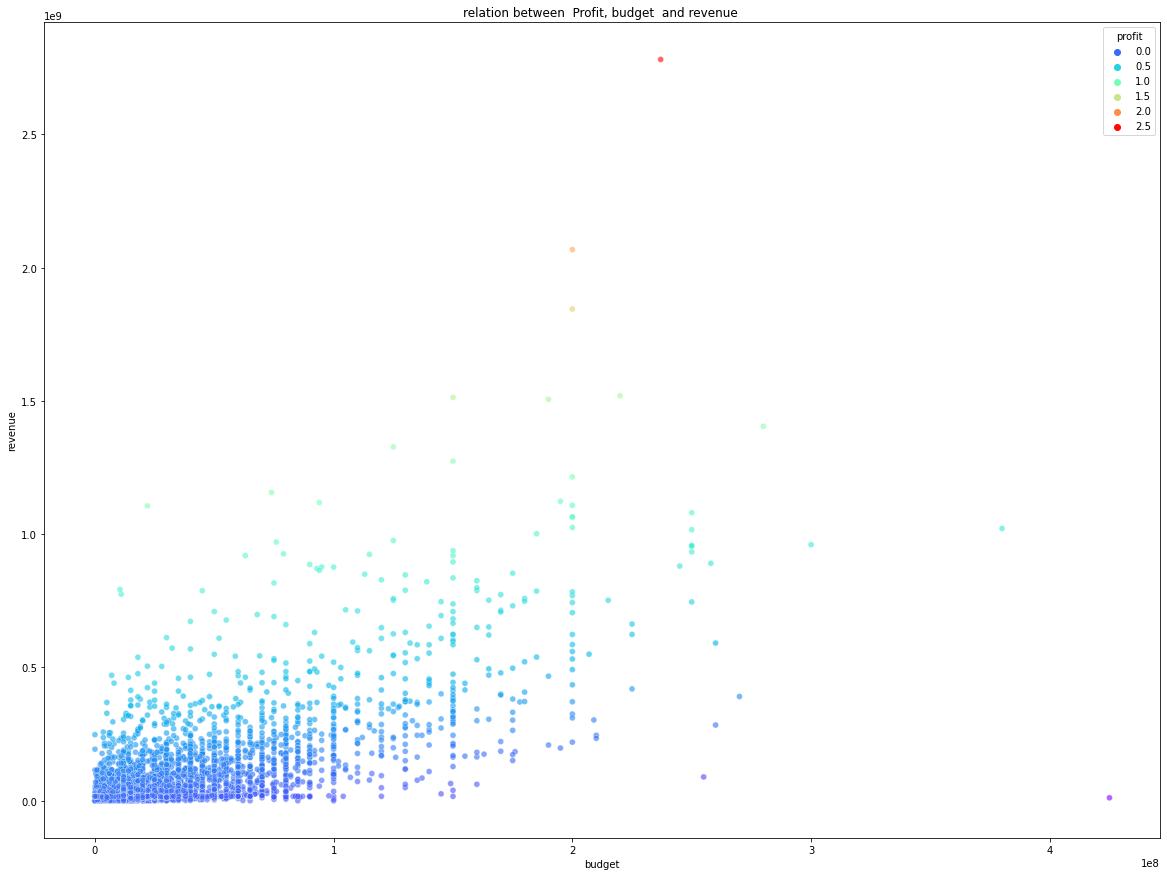

In [124]:
plt.figure(figsize= (20,15))
plt.subplot(1,1,1)
# sns.scatterplot(df1.budget, df1.revenue,hue=df1.profit,alpha=0.6)
sns.scatterplot(df1.budget, df1.revenue,hue=df1.profit, palette='rainbow' ,alpha=0.6)
plt.title("relation between  Profit, budget  and revenue ")

In [126]:
# this plot shows increasing the budget can lead to increase in the revenue but we have some cases at the same budget we have different revenues which means that there are other factors affecting the profit will include in the conclusion 

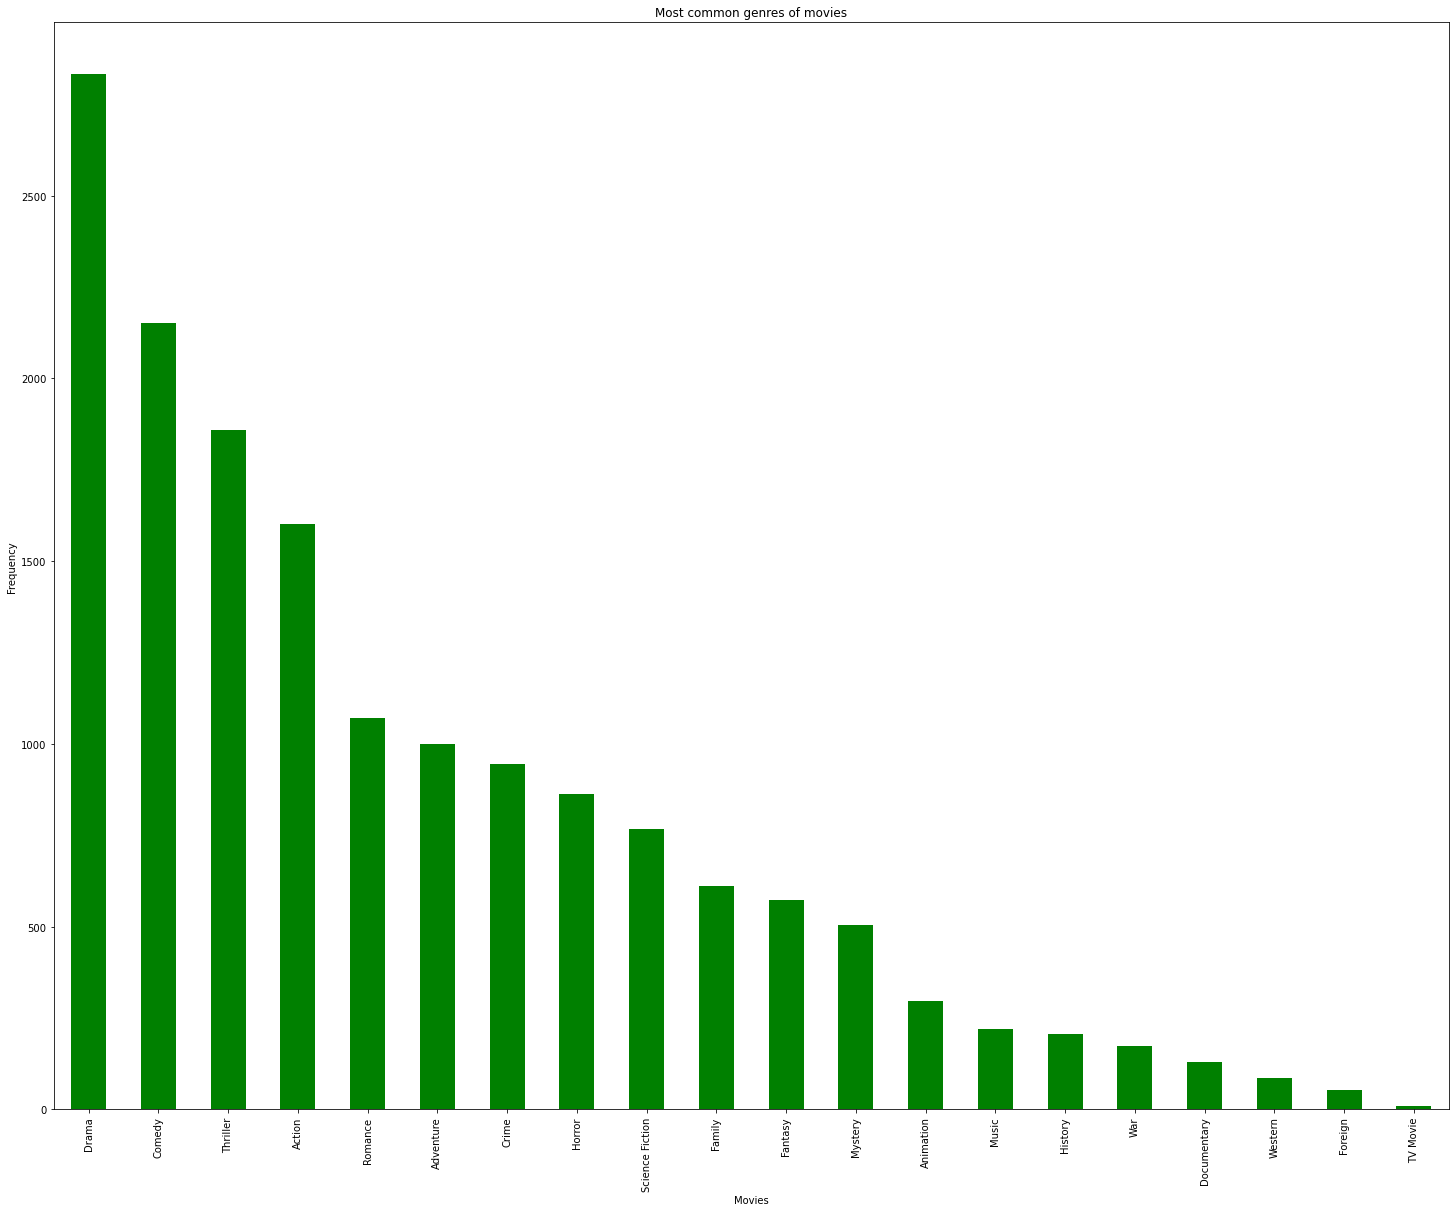

In [104]:
plt.figure(figsize=(25,20))

plt.subplot(1,1,1)
df1['genres'].str.split('|').explode('genres').value_counts(ascending=False).plot(kind='bar', color='green'), plt.title('Most common genres of movies'),
plt.ylabel('Frequency'), plt.xlabel('Movies');

In [111]:
# I got this plot from the net as I wanted to get the most frequent generes as this shows inthe previous plots that it has a big effect on the profit of the movies

# and looks like from drama to action are the most popular and get the highst profit

In [127]:
# Conclusions
# Based on this analysis I found that budget and revenue are critical for making a movie while increasing the budget will lead to higher revenue but not all the time

#while we can use this budget to make more advertisment since popularity has a direct effect on that beside the genere of the movie too 


# and this is achieveable as the number of audince and people who are itrested in movies increased a lot since 2010